# Entanglement distillation  in a correlated quantum liquid

In [1]:
import numpy as np
import matplotlib.pyplot as plt

__Generating the Fermi surface for the electronic dispersion $\epsilon_{\mathbf{k}}=-2t(\cos k_{x}+\cos k_{y})$__ at $\mu =0$ $\Rightarrow$ $k_{Fx}+k_{Fy}=\pi$

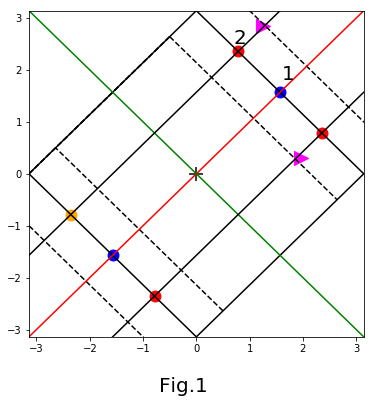

In [32]:
kFx=np.linspace(0,np.pi,100)
kFy=np.pi-np.linspace(0,np.pi,100)
plt.rcParams['figure.figsize'] = [6,6]
plt.plot(kFx,kFy,color='k')
plt.plot(kFx,-kFy,color='k')
plt.plot(-kFx,-kFy,color='k')
plt.plot(-kFx,kFy,color='k')
plt.plot(kFx+0.5,kFy+0.5,color='k',linestyle='--')
plt.plot(kFx-0.5,kFy-0.5,color='k',linestyle='--')
plt.plot(-kFx+0.5,-kFy+0.5,color='k',linestyle='--')
plt.plot(-kFx-0.5,-kFy-0.5,color='k',linestyle='--')
plt.plot(-kFx-0.5,kFy-0.5,color='k',linestyle='--')
plt.plot(-kFx-0.5,kFy-0.5,color='k',linestyle='--')
plt.plot(np.linspace(-np.pi,np.pi,100),np.linspace(-np.pi,np.pi,100),color='r',linestyle="-")
plt.plot(np.linspace(-np.pi,np.pi,100),-np.linspace(-np.pi,np.pi,100),color='g',linestyle="-")
plt.plot(np.linspace(-np.pi,np.pi,100),np.linspace(-np.pi,np.pi,100)+np.pi/2.,color='k',linestyle="-")
plt.plot(np.linspace(-np.pi,np.pi,100),np.linspace(-np.pi,np.pi,100)-np.pi/2.,color='k',linestyle="-")
plt.text(1.6, 1.8, '1',size=20)
plt.text(0.7, 2.5, '2',size=20)
plt.xlim(-np.pi,np.pi)
plt.ylim(-np.pi,np.pi)
plt.scatter(np.pi/4,3*np.pi/4,s=120,color='red')
plt.scatter(np.pi/2,np.pi/2,s=120,color='blue')
plt.scatter(3*np.pi/4,np.pi/4,s=120,color='red')
plt.scatter(-np.pi/4,-3*np.pi/4,s=120,color='red')
plt.scatter(-np.pi/2,-np.pi/2,s=120,color='blue')
plt.scatter(-3*np.pi/4,-np.pi/4,s=120,color='orange')
plt.scatter(np.pi/2.5,np.pi/1.1,color='magenta',s=200,marker='>')
plt.scatter(np.pi/1.6,np.pi/10.5,color='magenta',s=200,marker='>')
plt.scatter(0,0,color='black',s=200,marker='+')
plt.text(-0.7,-4.2,"Fig.1",size=20)
Lambda0=np.pi/np.sqrt(2)
plt.show()

__Construction of isogeometric curves parallel to the Fermi surface $\mathbf{k}_{\Lambda\hat{s}}=\mathbf{k}_{F\hat{s}}+\Lambda\hat{s}$__

The dashed lines represents isogeometric curves parallel to Fermi surface. The red dot(1) and blue dot(2) in Fig.1 represents the normal $\hat{s}$. In this program we consider the normal vectors(1) and (2) and there reflection counterparts about the lines $k_{x}=k_{y}$ (red)and $k_{x}=-k_{y}$(green). The magenta triangles comprise a resonant pair involving states $\hat{s}=(s_{x},s_{y}$ and $T\hat{s}=(s_{y},s_{x})$.

In [33]:
Lambda0=np.pi/np.sqrt(2)
RGsteps=25
LambdaF=(Lambda0/(2.15*np.sqrt(2)))*np.linspace(0.0,1.,RGsteps)[::-1]
delta =-4.0
kx=np.array([np.pi/2+LambdaF,np.pi/4+LambdaF])
ky=np.array([np.pi/2+LambdaF,3*np.pi/4+LambdaF])
kx1=np.array([np.pi/2-LambdaF+delta/np.sqrt(2),3*np.pi/4-LambdaF+delta/np.sqrt(2)])
ky1=np.array([np.pi/2-LambdaF+delta/np.sqrt(2),np.pi/4-LambdaF+delta/np.sqrt(2)])

In [34]:
1/(LambdaF[0]-LambdaF[1])

32.84958025416716

__Writing electronic dispersion for states residing along normals $1$ and $2$ and there reflection counter parts marked by magenta dots.__

In [35]:
EkOut=np.array([-2*(np.cos(kx[0])+np.cos(ky[0])),-2*(np.cos(kx[1])+np.cos(ky[1]))])
EkInT=np.array([-2*(np.cos(kx1[0])+np.cos(ky1[0])),-2*(np.cos(kx1[1])+np.cos(ky1[1]))])
#Bandwith W=8t, t=1
W=8

__Defining the magnitude of the bare Hubbard coupling $U_{0}=8/N$ in momentum space and the flucn. scale__ $\omega=W/2$ 

In [36]:
U0 = 8./(50)
omega = W/2.

__Renormalization group equations resulting out of the unitary transformations<br>
Hubbard Model
$H=\sum\epsilon_{\mathbf{k}_{\Lambda\hat{s}}}\hat{n}_{\mathbf{k}_{\Lambda\hat{s}}}+U\sum_{\mathbf{r}}\hat{n}_{\mathbf{r}\sigma}\hat{n}_{\mathbf{r}-\sigma}$<br>
Arrangement of Lambda's : $\Lambda_{N}>\Lambda_{N-1}>\ldots >0$<br>
Unitary transformation: $U_{(j)}=\prod_{l=(s,\sigma)}U_{j,l}, ~U_{j,l}=\frac{1}{\sqrt{2}}\left[1+\eta_{j,l}-\eta^{\dagger}_{j,l}\right]$ , $\eta_{j,l}=\frac{1}{\hat{\omega}_{(j,l-1)}-Tr_{j,l}(H^{D}_{(j,l-1)}\hat{n}_{j,l-1})}Tr(H^{X}_{(j,l-1)}c_{j,l})$<br>
Resulting RG equations<br>
Forward Scattering-
\begin{aligned}
V_{c,l}^{(j)}=V_{c,l}^{(j-1)}-\frac{(V_{c,l}^{(j-1)})^{2}}{\frac{1}{2}(\epsilon_{\Lambda_{j-1}\hat{s}}+\epsilon_{\Lambda_{j-1} -\hat{s}})-\omega+\frac{1}{4}V_{c,l}^{(j-1)}}
\end{aligned}
Backward Scattering-
\begin{aligned}
K_{c,l}^{(j)}=K_{c,l}^{(j-1)}-\frac{(K_{c,l}^{(j-1)})^{2}}{\omega - \frac{1}{2}(\epsilon_{\Lambda_{j-1}\hat{s}}+\epsilon_{\Lambda_{j-1} -\hat{s}})+\frac{1}{4}K_{c,l}^{(j-1)}}
\end{aligned}
<br>
Tangential Scattering-
\begin{aligned}
L^{(j)}=L^{(j-1)}-\frac{N_{F}^{2}(L^{(j-1)})^{2}}{ \frac{1}{2N'}\sum_{s}(\epsilon_{\Lambda_{j-1}\hat{s}}+\epsilon_{\Lambda_{j-1} -\hat{s}})-\omega+\frac{1}{4}L^{(j-1)}}
\end{aligned}
<br>__

In [37]:
def vertexRGIterator():
    invG = W/2.-0.5*(EkOut+EkInT)
    Kc=np.array([U0+0.0*LambdaF,U0+0.0*LambdaF])
    Vc=np.array([U0+0.0*LambdaF,U0+0.0*LambdaF])
    L = U0+0.0*LambdaF
    invTanG = 0.25*(EkOut[0]+EkInT[0]+EkOut[1]+EkInT[1])-omega
    LambdaStar=np.array([0.0,0.0])
    LambdaStarTan=0.0
    for j in range(2):#Loop over different normal directions
        for i in range(RGsteps-1):#Loop over RG steps Lambda direction normal to FS
            if ((invG[j][i]-Kc[j][i]/4.)>2.0):
                #Back Scattering RG equation
                Kc[j][i+1] = Kc[j][i] +Kc[j][i]*Kc[j][i]/(invG[j][i]-Kc[j][i]/4.)
                LambdaStar[j] = LambdaF[i]
            else:
                Kc[j][i+1] = Kc[j][i]
            #Forward Scattering RG equation    
            Vc[j][i+1] = Vc[j][i] +Vc[j][i]*Vc[j][i]/(-invG[j][i]-Vc[j][i]/4.)
    for i in range(RGsteps-1):#Loop over different normal directions
            
                L[i+1] = L[i] +L[i]*L[i]/(invTanG[i]-L[i]/4.)
                LambdaStarTan = LambdaF[i]

            
    return LambdaStar,Kc,Vc,LambdaStarTan,L

In [38]:
LambdaStar,Kc,Vc,LambdaStarTan,L=vertexRGIterator()

In [39]:
LambdaFp=np.max(LambdaF[Kc[0]==np.max(Kc[0])])
IndexOfLambdaFp=np.where(LambdaF==LambdaFp)[0][0]
#At this step we are choosing seven points along any normal from 25 points. 
RGIt=7
LambdaFtrunc=LambdaF[np.where(LambdaF==LambdaFp)[0][0]-RGIt:np.where(LambdaF==LambdaFp)[0][0]]
VcTrunc0=np.asarray([Vc[0][LambdaF==Lambda]for Lambda in LambdaFtrunc])
VcTrunc1=np.asarray([Vc[1][LambdaF==Lambda]for Lambda in LambdaFtrunc])
KcTrunc0=np.asarray([Kc[0][LambdaF==Lambda]for Lambda in LambdaFtrunc])
KcTrunc1=np.asarray([Kc[1][LambdaF==Lambda]for Lambda in LambdaFtrunc])
LTrunc=np.asarray([L[LambdaF==Lambda]for Lambda in LambdaFtrunc])
EkOut0Trunc=np.asarray([EkOut[0][LambdaF==Lambda] for Lambda in LambdaFtrunc])
EkOut1Trunc=np.asarray([EkOut[1][LambdaF==Lambda] for Lambda in LambdaFtrunc])
EkIn0Trunc=np.asarray([EkInT[0][LambdaF==Lambda] for Lambda in LambdaFtrunc])
EkIn1Trunc=np.asarray([EkInT[1][LambdaF==Lambda] for Lambda in LambdaFtrunc])
def LambdasForEntanglementRG():
    return LambdaFtrunc/Lambda0
def dispersionForEntanglementRG():
    return EkOut0Trunc,EkOut1Trunc,EkIn0Trunc,EkIn1Trunc



## Coefficient Renormalization Group equation

Hamiltonian at fixed point is given by $H^{*}=K_{c}\mathbf{A}^{*}_{s}\cdot\mathbf{A}^{*}_{-s}$. To obtain $H^{*}$ we chose the subspace with $\mathbf{S}_{\Lambda s}=0$. The ground state wavefunction at the fixed point is given by
\begin{aligned}|\Psi\rangle =\sum_{p} C_{p}\prod_{s}
 |A_{*,s}=A_{*,-s} = N^{*}_{s},A^{z}_{*,s}=-A^{z}_{*,-s} = p_{s}\rangle |\sigma^{z}_{j^{*},s}\ldots \sigma^{z}_{N(s),s}\rangle, \sigma^{z}_{n,s}=+1\end{aligned}
 where $p=\lbrace p_{1},p_{2},\ldots,p_{l}\rbrace$, i.e. there are $l$ normal $\hat{s}$' s.
The charge pseudospins are defined as $\mathbf{A}_{*,s}=\sum_{\Lambda<\Lambda^{*}}\mathbf{A}_{\Lambda,s}$, and  $C_{p}=\prod_{s}\frac{(-1)^{N^{*}_{s}-p_{s}}}{\sqrt{2N^{*}_{s}+1}}$.<br>
<par> 

We can now  perform the reverse unitary transformations given by $U^{\dagger}_{(j)}$ on the fixed point wavefunction to discover the entanglement distillation procedure of the $U^{\dagger}_{(j^{*})}|\Psi\rangle=|\Psi_{1}\rangle$, $U^{\dagger}_{(j^{*}+1)}|\Psi_{1}\rangle=|\Psi_{2}\rangle$ and so on...

The coefficient flow equation is obtained as follows:
\begin{aligned}
|\Psi_{(j)}\rangle =\sum_{p,\sigma_{z}(j)} C_{p,j}(\sigma_{z}(j))\prod_{s=-l}^{l} |N^{*}_{s},p_{s}\rangle|\sigma_{z}(j)\rangle|\underbrace{\sigma^{z}_{j+1,s},\ldots,\sigma^{z}_{N(s),s}}_{\text{decoupled space}}\rangle, \sigma_{z}(j)=\lbrace (\sigma^{z}_{j^{*},1},\ldots,\sigma^{z}_{j,1}),\ldots,(\sigma^{z}_{j^{*},l},\ldots,\sigma^{z}_{j,l})\rbrace
\end{aligned} where $A^{z}_{j,s}|\sigma^{z}_{j,s}\rangle = \sigma^{z}_{j,s}|\sigma^{z}_{j,s}\rangle$.<br>

The unitary transformation of the many body wavefunction in the reverse RG journey is represented as,
\begin{aligned}
|\Psi_{(j+1)}\rangle =U^{\dagger}_{(j+1)}|\Psi_{(j)}\rangle,
\end{aligned}
\begin{aligned}
|\Psi_{(j+1)}\rangle =\sum_{p,\sigma_{z}(j+1)} C_{p,j+1}(\sigma_{z}(j+1))\prod_{s=-l}^{l} |\mathbf{A}_{*,s}=N^{*}_{s},A^{z}_{*,s}=p_{s}\rangle|\sigma_{z}(j+1)\rangle|\sigma^{z}_{j+2,s},\ldots,\sigma^{z}_{N(s),s}\rangle, 
\end{aligned}
where, 
\begin{aligned}
\sigma_{z}(j,s')=\lbrace(\sigma^{
z}_{j^{*},1},\ldots,\sigma^{z}_{j+1,1}),..,(\sigma^{
z}_{j^{*},s'},\ldots,\sigma^{z}_{j+1,s'}),..,(\sigma^{
z}_{j^{*},n},\ldots,\sigma^{z}_{j+1,n})\rbrace~.
\end{aligned}
Incorporating quantum fluctuations from various longitudinal and tangential scattering vertices via action of $U^{\dagger}_{(j+1)}$ on $|\Psi_{(j)}\rangle$ we write down $|\Psi_{(j+1)}\rangle$ as ,
\begin{aligned}
|\Psi_{(j+1)}\rangle = |\Psi_{(j)}\rangle -\sum_{p(s''),\sigma_{z}(j,s''),s'',s'}G_{j}L^{(j)}C_{p,j}(\sigma_{z}(j,s'))c_{p(s'')}\prod_{s=-l}^{l} |\mathbf{A}_{*,s}=N^{*}_{s},A^{z}_{*,s}=p_{s}\rangle|\sigma_{z}(j+1)\rangle|\sigma^{z}_{j+2,s},\ldots,\sigma^{z}_{N(s),s}\rangle\\
-\sum_{p(s'),\sigma_{z}(s'),s'}G_{j,s'}K_{s'}^{(j)}C_{p,j}(\sigma_{z}(j,-s'))c_{p(s')}\prod_{s=-l}^{l} |\mathbf{A}_{*,s'}=N^{*}_{s'},A^{z}_{*,s'}=p_{s}\rangle|\sigma_{z}(j+1)\rangle|\sigma^{z}_{j+2,s},\ldots,\sigma^{z}_{N(s),s}\rangle\\
-\sum_{p(s'),\sigma_{z}(s'),s'}G_{j,s'}V_{s'}^{(j)}C_{p,j}(\sigma_{z}(j,s'))c_{p(s')}\prod_{s=-l}^{l} |\mathbf{A}_{*,s'}=N^{*}_{s'},A^{z}_{*,s'}=p_{s}\rangle|\sigma_{z}(j+1)\rangle|\sigma^{z}_{j+2,s},\ldots,\sigma^{z}_{N(s),s}\rangle
\end{aligned}
Finally also note that $|\mathbf{A}_{*,s}=N^{*}_{s},A^{z}_{*,s}=p_{s}\rangle =  \sum_{\mu}\frac{1}{\sqrt{\binom{2N^{*}_{s}}{N^{*}_{s}-p_{s}}}}\prod\limits_{i=1}^{N^{*}_{s}-p_{s}}|\uparrow_{\mu_{i}}\rangle\prod\limits_{i=N^{*}_{s}-p_{s}+1}^{2N^{*}_{s}}|\downarrow_{\mu_{i}}\rangle $, $\sigma^{z}_{\mu_{i}}|\uparrow_{\mu_{i}}\rangle=|\uparrow_{\mu_{i}}\rangle$, $\sigma^{z}_{\mu_{i}}|\downarrow_{\mu_{i}}\rangle=-|\downarrow_{\mu_{i}}\rangle$




First we need to build a multidimensional array to represent the 2^{N} dimensional Hilbert space made of an antisymmetrized product over 
\begin{aligned}
\mathcal{H}=\mathcal{A}(\mathcal{H}\times\mathcal{H}\times \ldots\times\mathcal{H})
\end{aligned}
This we need to do by building a multidimensional array say $mbCoeffArr$ as follows whose entries are called by $[i_{1}][i_{2}]...[][i_{N}]$ where $i=\lbrace i_{1},i_{2},\ldots, i_{N}\rbrace $ is a binary string of length $N$ such as $i=\lbrace 0,1,0,1,0,....,0,1,1,...,1,1\rbrace$. <br>
Here $N=($no. of normal $\hat{s}$)$\times$ (no. of $\Lambda$ steps from Fermi surface).
For this problem there are four pairs of electronic states we will choose<br>
\begin{aligned}
    s_{1}=(\pi/2,\pi/2),\mathbf{k}_{\Lambda\hat{s}_{1}}, \mathbf{k}_{-\Lambda+\delta,\hat{s}_{1}}, s_{2}=(-\pi/2,-\pi/2),\mathbf{k}_{\Lambda\hat{s}_{2}}, \mathbf{k}_{-\Lambda+\delta,\hat{s}_{2}}\\
    s_{3}=(\pi/4,3\pi/4),\mathbf{k}_{\Lambda\hat{s}_{3}}, \mathbf{k}_{-\Lambda+\delta,T\hat{s}_{3}}, s_{4}=(-\pi/4,-3\pi/4), \mathbf{k}_{\Lambda\hat{s}_{4}}, \mathbf{k}_{-\Lambda+\delta,T\hat{s}_{4}}
\end{aligned}

In [40]:
#We are making an array of four normal directions here
sNormal=np.array([np.pi/2,-np.pi/2,np.pi/4,-np.pi/4])
#number of pseudospins
#No. of normal directions
Ns=len(sNormal)
#As we have chosen four normal directions therefore N=4k
N=RGIt*Ns#LambdaFMesh.size

__Designing ground state wavefunction__<br>
__For N=28 pseudospins, i.e. 7 pseudospins along each of four normal direction__<br>
Among N=28 pseudospins 5 of them located along 4 normal $6 \times 4=24$, farthest from the Fermi surface are disentangled. Among the rest 4 pseudospins, normals $\hat{s}_{1}$, $\hat{s}_{2}$ give rise to 1 pseudospin each and similarly 2 other pseudospins are formed along normals $\hat{s}_{3}$, $\hat{s}_{4}$. The pseudospin flip backscattering processes between normals $\hat{s}_{1}$ and $\hat{s}_{2}$ lead to a singlet formation out of them. Similarly the backscattering between normals $\hat{s}_{3}$ and $\hat{s}_{4}$ leads to the other singlet. All in all this leads to an overall singlet.These singlets configurations are achieved as follows: if $k_{1}$ pseudospins formed at $\hat{s}_{1}$ are along $|\Uparrow\rangle$ configuration while $2-k_{1}$ are along $|\Downarrow\rangle$ configuration then the net pseudospin angular momentum is $k_{1}-1$. Along $\hat{s}_{2}$ the net angular momentum is $k_{2}-1$. If the sum of these angular momentum has to be zero then $k_{1}+k_{2}=2$. In the equations above $k_{1}-1=p$, $k_{2}-1=-p$.<br>

In [41]:
Psi = open("manyBodyWaveFunction28#0.txt","+w")
#Obtaining the ground state wavefunction
#function returns string with array as input
def method(basisState):
    return ''.join([str(num) for num in basisState])
#printing the computational basis states in the file
labels=(''.join([str(num) for num in range(RGIt)]))*len(sNormal)+'\n'+''.join([str(num)*RGIt for num in range(Ns)])+'\n'
Psi.write(labels)
#hole/electron like configurations for the three higher/lower in energy Ioms Lambda0>Lambda1>Lambda2/Lambda3>Lambda4>Lambda5
IomString='000111'
#configurations of pseudospins in emergent space Lambda6 
Conf1=IomString+'0'+IomString+'0'+IomString+'1'+IomString+'1'
Conf2=IomString+'0'+IomString+'1'+IomString+'1'+IomString+'0'
Conf3=IomString+'1'+IomString+'0'+IomString+'0'+IomString+'1'
Conf4=IomString+'1'+IomString+'1'+IomString+'0'+IomString+'0'
Confs=[Conf1,Conf2,Conf3,Conf4]
weights=[0.5,-0.5,-0.5,0.5]
for i in range(len(Confs)):
    Psi.write(Confs[i]+str(weights[i])+"\n")      
Psi.close()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

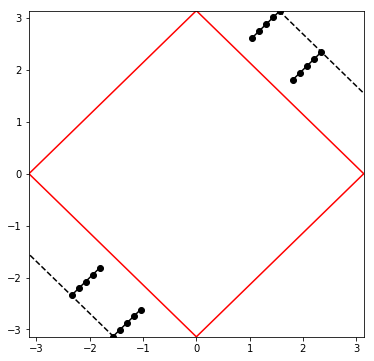

In [42]:
Qx=np.linspace(np.pi/np.sqrt(3),np.pi/np.sqrt(1.8),5)
Qy=np.linspace(np.pi/np.sqrt(3),np.pi/np.sqrt(1.8),5)
plt.rcParams['figure.figsize'] = [6,6]
plt.plot(Qx,Qy,color='k',marker='o')
plt.plot(np.linspace(np.pi/np.sqrt(9),np.pi/2,5),np.linspace(np.pi/np.sqrt(9),np.pi/2,5)+np.pi/2.,color='k',linestyle="-",marker='o')
plt.plot(kFx,kFy,color='r')
plt.plot(-kFx,kFy,color='r')
plt.plot(kFx+1.55,kFy,color='k',linestyle='--')
plt.plot(-kFx,-kFy,color='r')
plt.plot(kFx,-kFy,color='r')
plt.plot(-kFx-1.55,-kFy,color='k',linestyle='--')
plt.plot(-np.linspace(np.pi/np.sqrt(9),np.pi/2,5),-np.linspace(np.pi/np.sqrt(9),np.pi/2,5)-np.pi/2.,color='k',linestyle="-",marker='o')
plt.plot(-Qx,-Qy,color='k',marker='o')
plt.xlim(-np.pi,np.pi)
plt.ylim(-np.pi,np.pi)
plt.plot

In [43]:
from IPython.display import Image
Image(filename='scatteringProcessesFermiGeometry.png')

FileNotFoundError: [Errno 2] No such file or directory: 'scatteringProcessesFermiGeometry.png'

The above figure represents the ground state configuration of a system of 20 pseudospins of which 4 pseudospins
(indicated by 4) are entangled with each other in a pairwise manner along normals $\hat{s}_{1}$ and $\hat{s}_{3}$. On the other hand the decoupled states reside at $\Lambda's$ marked 1, 2, 3.<br> 
__Algorithm for Many body Wavefunction Renormalization 1st reverse RG step__<br>
__1.__ Firstly account for all the configurations which result upon entanging the ioms with GS via the unitary operation.<br>
__2.__ Secondly use the unitary matrix elements to determine the weight factor for each of the resulting configurations.

In [44]:
#ee Green function for the longitudinal scattering processes along normals s_{1} and s_{3}
invG = W/2.-0.5*(EkOut+EkInT)
#ee Green function for the tangential scattering processes
invTanG = 0.25*(EkOut[0]+EkInT[0]+EkOut[1]+EkInT[1])-omega
#-----------------------------Reverse RG-------------------------------------------
#calling the ith reverse RG step wavefunction from the file
fileIndex=['0','1','2','3','4','5','6']#,'4','5','6']#,'4','5','6']#['0','1','2','3','4','5','6']

for n in range(len(fileIndex))[:-1]:
    print("File No:",n)
    i=RGIt-n-2
    Psi = open("manyBodyWaveFunction28#"+fileIndex[n]+".txt","+r")
    PsiConf=Psi.readlines()
    manyBodyKetGS=np.array([np.array([conf[:N],conf[N:]])for conf in PsiConf[2:]])
    PsiOld=np.rec.fromarrays([manyBodyKetGS[:,0],manyBodyKetGS[:,1].astype(np.float64)], names='keys,vals')
    #performing the reverse RG step by re-entangling the ioms
    #value of the couplings at the reverse RG step
    Couplings=np.array([np.array([-Vc[0][LambdaF==LambdaFtrunc[i]],-Vc[1][LambdaF==LambdaFtrunc[i]]]),
                        np.array([-Kc[0][LambdaF==LambdaFtrunc[i]],-Kc[1][LambdaF==LambdaFtrunc[i]]]),
                        -L[LambdaF==LambdaFtrunc[i]]])
    greenFunc = np.array([np.array([-invG[0][LambdaF==LambdaFtrunc[i]]-Vc[0][LambdaF==LambdaFtrunc[i]],
                                    -invG[1][LambdaF==LambdaFtrunc[i]]-Vc[1][LambdaF==LambdaFtrunc[i]]]),
                          np.array([invG[0][LambdaF==LambdaFtrunc[i]]-Kc[0][LambdaF==LambdaFtrunc[i]],
                                    invG[1][LambdaF==LambdaFtrunc[i]]-Kc[1][LambdaF==LambdaFtrunc[i]]]),
                          invTanG[LambdaF==LambdaFtrunc[i]]-L[LambdaF==LambdaFtrunc[i]]]) 

    newCompleteString=''
    PsiNew = np.rec.fromarrays([np.zeros(len(PsiOld)*(RGIt-i-1)*16,dtype='<U32') ,np.zeros(len(PsiOld)*(RGIt-i-1)*16,dtype=np.float32)], names='keys,vals')
    #putting old confs into new conf
    Nold=len(PsiOld)
    PsiNew['keys'][0:Nold]=PsiOld['keys']
    PsiNew['vals'][0:Nold]=PsiOld['vals']
    count=0
    for Config in PsiOld:
        print("configs")
        print(count,Nold)
        count=count+1
        #comparing configuration of this iom with the members of the emSpace configuration along normals
        #in order $\hat{s}_{1},\hat{s}_{2},\hat{s}_{3},\hat{s}_{4}$
        for j in range(RGIt-i-1):
            #Configuration of iom to be entangled in this step
            iomConf = Config['keys'][i]
            #Accounting for tangential scattering processes from $\hat{s}_{1}$ to $\hat{s}_{3}$ and $\hat{s}_{4}$.
            #if configuration of the iom not match with emSpace states along normals s_{4} then swap
            if(iomConf!=Config['keys'][i+j+3*RGIt+1]):
                newConfig = Config['keys'][0:i]+Config['keys'][i+j+3*RGIt+1]+Config['keys'][i+1:i+j+3*RGIt+1]+iomConf+Config['keys'][i+j+3*RGIt+2:N]
                coeff = greenFunc[2]*Couplings[2]*Config['vals']
                #truth values checking if new configuration is in old wavefunction
                tval=PsiNew['keys'][0:Nold]==newConfig
                if(tval.any()==False):
                    (ind,coeff)=(Nold,coeff)
                    Nold=Nold+1
                else:
                    newCoeff=np.sum(tval*PsiNew['vals'][0:Nold])+coeff
                    if(newCoeff!=0.0): 
                        (ind,coeff)=(np.where(tval)[0][0], newCoeff)
                PsiNew['vals'][ind]=coeff
                PsiNew['keys'][ind]=newConfig
            #if configuration of the iom not match with emSpace states along normals s_{3} then swap
            if(iomConf!=Config['keys'][i+j+2*RGIt+1]):
                newConfig = Config['keys'][0:i]+Config['keys'][i+j+2*RGIt+1]+Config['keys'][i+1:i+j+2*RGIt+1]+iomConf+Config['keys'][i+j+2*RGIt+2:N]
                coeff = greenFunc[2]*Couplings[2]*Config['vals']
                #truth values checking if new configuration is in old wavefunction
                tval=PsiNew['keys'][0:Nold]==newConfig
                if(tval.any()==False):
                    (ind,coeff)=(Nold,coeff)
                    Nold=Nold+1
                else:
                    newCoeff=np.sum(tval*PsiNew['vals'][0:Nold])+coeff
                    if(newCoeff!=0.0): 
                        (ind,coeff)=(np.where(tval)[0][0], newCoeff)
                PsiNew['vals'][ind]=coeff
                PsiNew['keys'][ind]=newConfig       
            #Accounting for back scattering processes
            #if configuration of the iom not match with emSpace states along normals s_{2} then swap
            if (iomConf!=Config['keys'][i+j+RGIt+1]):
                newConfig = Config['keys'][0:i]+Config['keys'][i+j+RGIt+1]+Config['keys'][i+1:i+j+RGIt+1]+iomConf+Config['keys'][i+j+RGIt+2:N]
                coeff=greenFunc[1][0]*Couplings[1][0]*Config['vals']
                #truth values checking if new configuration is in old wavefunction
                tval=PsiNew['keys'][0:Nold]==newConfig
                #truth values checking if new configuration is in old wavefunction
                tval=PsiNew['keys'][0:Nold]==newConfig
                if(tval.any()==False):
                    (ind,coeff)=(Nold,coeff)
                    Nold=Nold+1
                else:
                    newCoeff=np.sum(tval*PsiNew['vals'][0:Nold])+coeff
                    if(newCoeff!=0.0): 
                        (ind,coeff)=(np.where(tval)[0][0], newCoeff)
                PsiNew['vals'][ind]=coeff
                PsiNew['keys'][ind]=newConfig
            #Accounting for forward scattering processes
            #if configuration of the iom not match with emSpace states along normals s_{1} then swap       
            if (iomConf!=Config['keys'][i+j+1]):
                newConfig = Config['keys'][0:i]+Config['keys'][i+j+1]+Config['keys'][i+1:i+j+1]+iomConf+Config['keys'][i+j+2:N]
                coeff=greenFunc[0][0]*Couplings[0][0]*Config['vals']
                #truth values checking if new configuration is in old wavefunction
                tval=PsiNew['keys'][0:Nold]==newConfig
                if(tval.any()==False):
                    (ind,coeff)=(Nold,coeff)
                    Nold=Nold+1
                else:
                    newCoeff=np.sum(tval*PsiNew['vals'][0:Nold])+coeff
                    if(newCoeff!=0.0): 
                        (ind,coeff)=(np.where(tval)[0][0], newCoeff)
                PsiNew['vals'][ind]=coeff
                PsiNew['keys'][ind]=newConfig      
            #Entangling iom at $\Lambda_{4}$ along normal $\hat{s}_{2}$  
            #comparing configuration of the said iom state with respect to configurations of the constituent pseudospins
            #in emergent space(emSpace)
            iomConf = Config['keys'][i+RGIt]
            #comparing configuration of this iom with the members of the emSpace configuration along normals
            #in order $\hat{s}_{1},\hat{s}_{2},\hat{s}_{3},\hat{s}_{4}$
            #Accounting for tangential scattering processes
            #if configuration of the iom not match with emSpace states along normals s_{4} then swap        
            if (iomConf!=Config['keys'][i+j+3*RGIt+1]):
                newConfig = Config['keys'][0:i+RGIt]+Config['keys'][i+j+3*RGIt+1]+Config['keys'][i+RGIt+1:i+j+3*RGIt+1]+iomConf+Config['keys'][i+j+3*RGIt+2:N]
                coeff = greenFunc[2]*Couplings[2]*Config['vals']
                #truth values checking if new configuration is in old wavefunction
                tval=PsiNew['keys'][0:Nold]==newConfig       
                if(tval.any()==False):
                    (ind,coeff)=(Nold,coeff)
                    Nold=Nold+1
                else:
                    newCoeff=np.sum(tval*PsiNew['vals'][0:Nold])+coeff
                    if(newCoeff!=0.0): 
                        (ind,coeff)=(np.where(tval)[0][0], newCoeff)
                PsiNew['vals'][ind]=coeff
                PsiNew['keys'][ind]=newConfig       
            #if configuration of the iom not match with emSpace states along normals s_{3} then swap
            if (iomConf!=Config['keys'][i+j+2*RGIt+1]):
                newConfig = Config['keys'][0:i+RGIt]+Config[0][i+j+2*RGIt+1]+Config[0][i+RGIt+1:i+j+2*RGIt+1]+iomConf+Config[0][i+j+2*RGIt+2:N]
                coeff = greenFunc[2]*Couplings[2]*Config['vals']
                #truth values checking if new configuration is in old wavefunction
                tval=PsiNew['keys'][0:Nold]==newConfig       
                if(tval.any()==False):
                    (ind,coeff)=(Nold,coeff)
                    Nold=Nold+1
                else:
                    newCoeff=np.sum(tval*PsiNew['vals'][0:Nold])+coeff
                    if(newCoeff!=0.0): 
                        (ind,coeff)=(np.where(tval)[0][0], newCoeff)
                PsiNew['vals'][ind]=coeff
                PsiNew['keys'][ind]=newConfig
            #Accounting for back scattering processes
            #if configuration of the iom not match with emSpace states along normals s_{1} then swap
            if (iomConf!=Config['keys'][i+j+1]):
                newConfig = Config['keys'][0:i+j+1]+iomConf+Config['keys'][i+j+2:i+RGIt]+Config['keys'][i+j+1]+Config['keys'][i+RGIt+1:N]   
                coeff = greenFunc[1][0]*Couplings[1][0]*Config['vals']
                #truth values checking if new configuration is in old wavefunction
                tval=PsiNew['keys'][0:Nold]==newConfig       
                if(tval.any()==False):
                    (ind,coeff)=(Nold,coeff)
                    Nold=Nold+1
                else:
                    newCoeff=np.sum(tval*PsiNew['vals'][0:Nold])+coeff
                    if(newCoeff!=0.0): 
                        (ind,coeff)=(np.where(tval)[0][0], newCoeff)
                PsiNew['vals'][ind]=coeff
                PsiNew['keys'][ind]=newConfig         
            #Accounting for forward scattering processes
            #if configuration of the iom not match with emSpace states along normals s_{2} then swap
            if (iomConf!=Config['keys'][i+j+RGIt+1]):
                newConfig = Config['keys'][0:i+RGIt]+Config['keys'][i+j+RGIt+1]+Config['keys'][i+RGIt+1:i+j+RGIt+1]+iomConf+Config['keys'][i+j+RGIt+2:N]
                coeff = greenFunc[0][0]*Couplings[0][0]*Config['vals']
                #truth values checking if new configuration is in old wavefunction
                tval=PsiNew['keys'][0:Nold]==newConfig
                if(tval.any()==False):
                    (ind,coeff)=(Nold,coeff)
                    Nold=Nold+1
                else:
                    newCoeff=np.sum(tval*PsiNew['vals'][0:Nold])+coeff
                    if(newCoeff!=0.0): 
                        (ind,coeff)=(np.where(tval)[0][0], newCoeff)
                PsiNew['vals'][ind]=coeff
                PsiNew['keys'][ind]=newConfig         
            #Entangling iom at $\Lambda_{4}$ along normal $\hat{s}_{3}$  
            #comparing configuration of the said iom state with respect to configurations of the constituent pseudospins
            #in emergent space(emSpace)
            iomConf = Config['keys'][i+2*RGIt]
            #comparing configuration of this iom with the members of the emSpace configuration along normals
            #in order $\hat{s}_{1},\hat{s}_{2},\hat{s}_{3},\hat{s}_{4}$
            #Accounting for tangential scattering processes
            #if configuration of the iom not match with emSpace states along normals s_{1} then swap
            if (iomConf!=Config['keys'][i+j+1]):
                newConfig = Config['keys'][0:i+j+1]+iomConf+Config['keys'][i+j+2:i+2*RGIt]+Config['keys'][i+j+1]+Config['keys'][i+2*RGIt+1:N]
                coeff = greenFunc[2]*Couplings[2]*Config['vals']
                #truth values checking if new configuration is in old wavefunction
                tval=PsiNew['keys'][0:Nold]==newConfig
                if(tval.any()==False):
                    (ind,coeff)=(Nold,coeff)
                    Nold=Nold+1
                else:
                    newCoeff=np.sum(tval*PsiNew['vals'][0:Nold])+coeff
                    if(newCoeff!=0.0): 
                        (ind,coeff)=(np.where(tval)[0][0], newCoeff)
                PsiNew['vals'][ind]=coeff
                PsiNew['keys'][ind]=newConfig
            #if configuration of the iom not match with emSpace states along normals s_{2} then swap
            if (iomConf!=Config['keys'][i+j+RGIt+1]):
                newConfig = Config['keys'][0:i+j+RGIt+1]+iomConf+Config['keys'][i+j+RGIt+2:i+2*RGIt]+Config['keys'][i+j+RGIt+1]+Config['keys'][i+2*RGIt+1:N]
                coeff = greenFunc[2]*Couplings[2]*Config['vals']
                #truth values checking if new configuration is in old wavefunction
                tval=PsiNew['keys'][0:Nold]==newConfig
                if(tval.any()==False):
                    (ind,coeff)=(Nold,coeff)
                    Nold=Nold+1
                else:
                    newCoeff=np.sum(tval*PsiNew['vals'][0:Nold])+coeff
                    if(newCoeff!=0.0): 
                        (ind,coeff)=(np.where(tval)[0][0], newCoeff)
                PsiNew['vals'][ind]=coeff
                PsiNew['keys'][ind]=newConfig 
            #Accounting for back scattering processes
            #if configuration of the iom not match with emSpace states along normals s_{4} then swap
            if (iomConf!=Config['keys'][i+j+3*RGIt+1]):
                newConfig = Config['keys'][0:i+2*RGIt]+Config['keys'][i+j+3*RGIt+1]+Config['keys'][i+2*RGIt+1:i+j+3*RGIt+1]+iomConf+Config['keys'][i+j+3*RGIt+2:N]
                coeff = greenFunc[1][1]*Couplings[1][1]*Config['vals']
                #truth values checking if new configuration is in old wavefunction
                tval=PsiNew['keys'][0:Nold]==newConfig
                if(tval.any()==False):
                    (ind,coeff)=(Nold,coeff)
                    Nold=Nold+1
                else:
                    newCoeff=np.sum(tval*PsiNew['vals'][0:Nold])+coeff
                    if(newCoeff!=0.0): 
                        (ind,coeff)=(np.where(tval)[0][0], newCoeff)
                PsiNew['vals'][ind]=coeff
                PsiNew['keys'][ind]=newConfig         
            #Accounting for forward processes
            #if configuration of the iom not match with emSpace states along normals s_{3} then swap
            if (iomConf!=Config['keys'][i+j+2*RGIt+1]):
                newConfig = Config['keys'][0:i+2*RGIt]+Config['keys'][i+j+2*RGIt+1]+Config['keys'][i+2*RGIt+1:i+j+2*RGIt+1]+iomConf+Config['keys'][i+j+2*RGIt+2:N]
                coeff = greenFunc[0][1]*Couplings[0][1]*Config['vals']
                #truth values checking if new configuration is in old wavefunction
                tval=PsiNew['keys'][0:Nold]==newConfig
                if(tval.any()==False):
                    (ind,coeff)=(Nold,coeff)
                    Nold=Nold+1
                else:
                    newCoeff=np.sum(tval*PsiNew['vals'][0:Nold])+coeff
                    if(newCoeff!=0.0): 
                        (ind,coeff)=(np.where(tval)[0][0], newCoeff)
                PsiNew['vals'][ind]=coeff
                PsiNew['keys'][ind]=newConfig
            #Entangling iom at $\Lambda_{4}$ along normal $\hat{s}_{4}$  
            #comparing configuration of the said iom state with respect to configurations of the constituent pseudospins
            #in emergent space(emSpace)
            iomConf = Config['keys'][i+3*RGIt]
            #comparing configuration of this iom with the members of the emSpace configuration along normals
            #in order $\hat{s}_{1},\hat{s}_{2},\hat{s}_{3},\hat{s}_{4}$
            #Accounting for tangential scattering processes
            #if configuration of the iom not match with emSpace 
            #if configuration of the iom not match with emSpace states along normals s_{2} then swap
            if (iomConf!=Config['keys'][i+j+RGIt+1]):
                newConfig = Config['keys'][0:i+j+RGIt+1]+iomConf+Config['keys'][i+j+RGIt+2:i+3*RGIt]+Config['keys'][i+j+RGIt+1]+Config['keys'][i+3*RGIt+1:N]
                coeff = greenFunc[2]*Couplings[2]*Config['vals']
                #truth values checking if new configuration is in old wavefunction
                tval=PsiNew['keys'][0:Nold]==newConfig
                if(tval.any()==False):
                    (ind,coeff)=(Nold,coeff)
                    Nold=Nold+1
                else:
                    newCoeff=np.sum(tval*PsiNew['vals'][0:Nold])+coeff
                    if(newCoeff!=0.0): 
                        (ind,coeff)=(np.where(tval)[0][0], newCoeff)
                PsiNew['vals'][ind]=coeff
                PsiNew['keys'][ind]=newConfig         
            #Accounting for back scattering processes
            #if configuration of the iom not match with emSpace states along normals s_{3} then swap
            if (iomConf!=Config['keys'][i+j+2*RGIt+1]):
                newConfig = Config['keys'][0:i+j+2*RGIt+1]+iomConf+Config['keys'][i+j+2*RGIt+2:i+3*RGIt]+Config['keys'][i+j+2*RGIt+1]+Config['keys'][i+3*RGIt+1:N]
                coeff = greenFunc[1][1]*Couplings[1][1]*Config['vals']
                #truth values checking if new configuration is in old wavefunction
                tval=PsiNew['keys'][0:Nold]==newConfig
                if(tval.any()==False):
                    (ind,coeff)=(Nold,coeff)
                    Nold=Nold+1
                else:
                    newCoeff=np.sum(tval*PsiNew['vals'][0:Nold])+coeff
                    if(newCoeff!=0.0): 
                        (ind,coeff)=(np.where(tval)[0][0], newCoeff)
                PsiNew['vals'][ind]=coeff
                PsiNew['keys'][ind]=newConfig         
            #Accounting for forward processes
            #if configuration of the iom not match with emSpace states along normals s_{4} then swap
            if (iomConf!=Config['keys'][i+j+3*RGIt+1]):
                newConfig = Config['keys'][0:i+3*RGIt]+Config['keys'][i+j+3*RGIt+1]+Config['keys'][i+3*RGIt+1:i+j+3*RGIt+1]+iomConf+Config['keys'][i+j+3*RGIt+2:N]
                coeff = greenFunc[0][1]*Couplings[0][1]*Config['vals']
                #truth values checking if new configuration is in old wavefunction
                tval=PsiNew['keys'][0:Nold]==newConfig
                if(tval.any()==False):
                    (ind,coeff)=(Nold,coeff)
                    Nold=Nold+1
                else:
                    newCoeff=np.sum(tval*PsiNew['vals'][0:Nold])+coeff
                    if(newCoeff!=0.0): 
                        (ind,coeff)=(np.where(tval)[0][0], newCoeff)
                PsiNew['vals'][ind]=coeff
                PsiNew['keys'][ind]=newConfig
    PsiNew=PsiNew[PsiNew['keys']!='']
    PsiNew['vals']=PsiNew['vals']/np.sqrt(np.sum(PsiNew['vals']*PsiNew['vals']))
    PsiWrite = labels + ''.join([conf['keys']+str(conf['vals'])+'\n' for conf in PsiNew])
    PsiReverseRG1= open("manyBodyWaveFunction28#"+fileIndex[n+1]+".txt","+w")
    PsiReverseRG1.write(PsiWrite)
    PsiReverseRG1.close()
    


File No: 0
configs
0 4
configs
1 11
configs
2 14
configs
3 19
File No: 1
configs
0 20
configs
1 27
configs
2 30
configs
3 35
configs
4 36
configs
5 39
configs
6 40
configs
7 44
configs
8 44
configs
9 48
configs
10 48
configs
11 51
configs
12 51
configs
13 51
configs
14 51
configs
15 51
configs
16 51
configs
17 51
configs
18 52
configs
19 52
File No: 2
configs
0 52
configs
1 59
configs
2 62
configs
3 67
configs
4 68
configs
5 71
configs
6 72
configs
7 76
configs
8 76
configs
9 80
configs
10 80
configs
11 83
configs
12 83
configs
13 83
configs
14 83
configs
15 83
configs
16 83
configs
17 83
configs
18 84
configs
19 84
configs
20 84
configs
21 87
configs
22 88
configs
23 92
configs
24 92
configs
25 96
configs
26 96
configs
27 99
configs
28 99
configs
29 99
configs
30 99
configs
31 99
configs
32 99
configs
33 99
configs
34 100
configs
35 100
configs
36 100
configs
37 100
configs
38 100
configs
39 100
configs
40 100
configs
41 100
configs
42 100
configs
43 100
configs
44 100
configs
45 100


configs
333 10275
configs
334 10283
configs
335 10287
configs
336 10307
configs
337 10323
configs
338 10335
configs
339 10335
configs
340 10335
configs
341 10335
configs
342 10343
configs
343 10350
configs
344 10356
configs
345 10398
configs
346 10436
configs
347 10470
configs
348 10505
configs
349 10547
configs
350 10585
configs
351 10623
configs
352 10654
configs
353 10698
configs
354 10737
configs
355 10772
configs
356 10803
configs
357 10846
configs
358 10885
configs
359 10920
configs
360 10947
configs
361 10970
configs
362 10989
configs
363 11012
configs
364 11039
configs
365 11062
configs
366 11088
configs
367 11104
configs
368 11136
configs
369 11160
configs
370 11180
configs
371 11196
configs
372 11227
configs
373 11254
configs
374 11277
configs
375 11289
configs
376 11297
configs
377 11301
configs
378 11313
configs
379 11321
configs
380 11325
configs
381 11337
configs
382 11345
configs
383 11349
configs
384 11368
configs
385 11383
configs
386 11394
configs
387 11394
configs
38

configs
789 18977
configs
790 19004
configs
791 19027
configs
792 19046
configs
793 19076
configs
794 19102
configs
795 19124
configs
796 19139
configs
797 19150
configs
798 19157
configs
799 19167
configs
800 19182
configs
801 19193
configs
802 19206
configs
803 19210
configs
804 19229
configs
805 19241
configs
806 19249
configs
807 19253
configs
808 19271
configs
809 19285
configs
810 19295
configs
811 19295
configs
812 19295
configs
813 19295
configs
814 19301
configs
815 19327
configs
816 19349
configs
817 19367
configs
818 19385
configs
819 19411
configs
820 19433
configs
821 19454
configs
822 19469
configs
823 19496
configs
824 19519
configs
825 19538
configs
826 19553
configs
827 19579
configs
828 19601
configs
829 19619
configs
830 19630
configs
831 19637
configs
832 19640
configs
833 19646
configs
834 19657
configs
835 19664
configs
836 19673
configs
837 19673
configs
838 19688
configs
839 19696
configs
840 19700
configs
841 19700
configs
842 19714
configs
843 19724
configs
84

KeyboardInterrupt: 